In [62]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
import gzip
from matplotlib import rc
import warnings

plt.style.use('seaborn-v0_8-white')
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
warnings.filterwarnings("ignore")

In [63]:
def load_data(filename):
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

# Example usage
loaded_data = load_data('arnold_sims/arnold_tongue_dict512by512.pkl.gz')

In [64]:
Omegas_tested = loaded_data["Omega"]
Coupling_strengths_tested = loaded_data["coupling_strength"]
A_ext_tested = loaded_data["A_ext"]
Entrainments = loaded_data["entrainment_value"]
Exceptions = loaded_data["exception"]
Ratios = np.array(loaded_data["calculated_ratio"])

[]

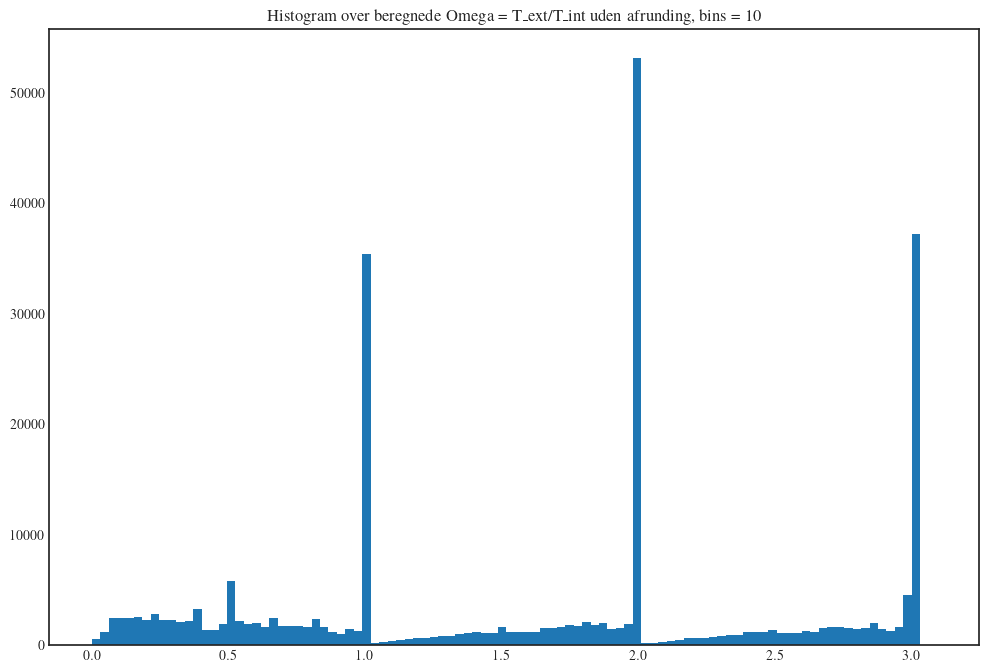

In [65]:
plt.figure(figsize=(12,8), dpi=100)
plt.hist(Ratios.ravel(), bins=100)

plt.title("Histogram over beregnede Omega = T_ext/T_int uden afrunding, bins = 10")
plt.plot()

[]

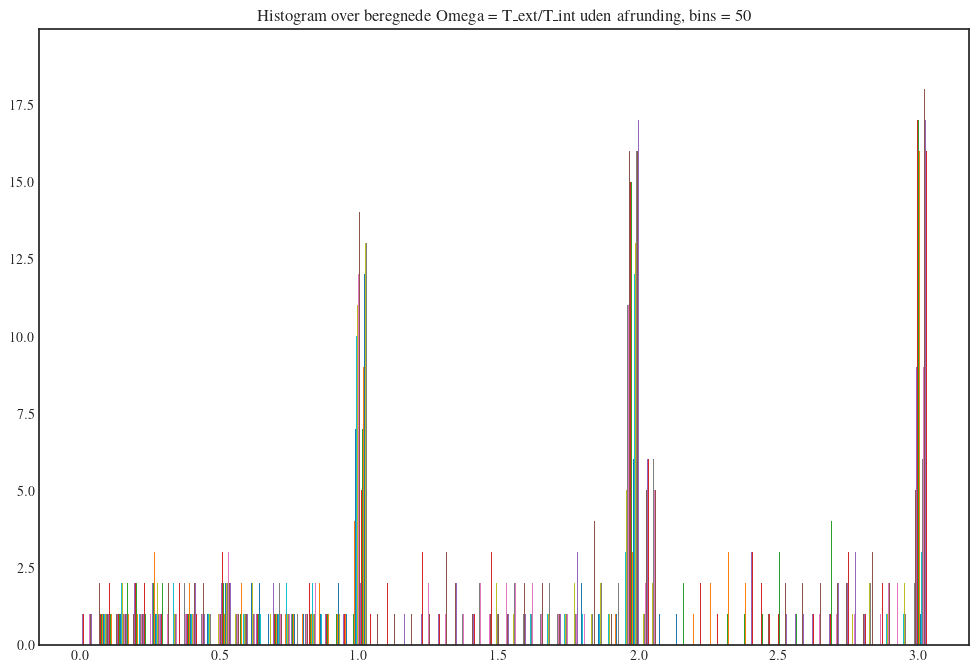

In [45]:
plt.figure(figsize=(12,8), dpi=100)
plt.hist(Ratios, bins=50)

plt.title("Histogram over beregnede Omega = T_ext/T_int uden afrunding, bins = 50")
plt.plot()

In [66]:
color_map = [
    # 'C7' if ratio - 1e-2 <= 1/4 <= ratio + 1e-2 else
    # 'C3' if ratio - 1e-2 <= 1/3 <= ratio + 1e-2 else
    'C0' if ratio - 1e-2 <= 2/4 <= ratio + 1e-2 else
    # 'C5' if ratio - 1e-2 <= 3/4 <= ratio + 1e-2 else
    'C1' if ratio - 1e-2 <= 1/1 <= ratio + 1e-2 else
    'C2' if ratio - 1e-2 <= 3/2 <= ratio + 1e-2 else
    # 'C9' if ratio - 1e-2 <= 1.97 <= ratio + 1e-2 else
    'C6' if ratio - 1e-2 <= 4/2 <= ratio + 1e-2 else
    'C4' if ratio - 1e-2 <= 5/2 <= ratio + 1e-2 else
    'C9' if ratio - 1e-2 <= 6/2 <= ratio + 1e-2 else
    'red' if Exceptions[i] == True else
    'white'
    for i, ratio in enumerate(Ratios.ravel())
]

Text(0.5, 0, 'External / Internal Period')

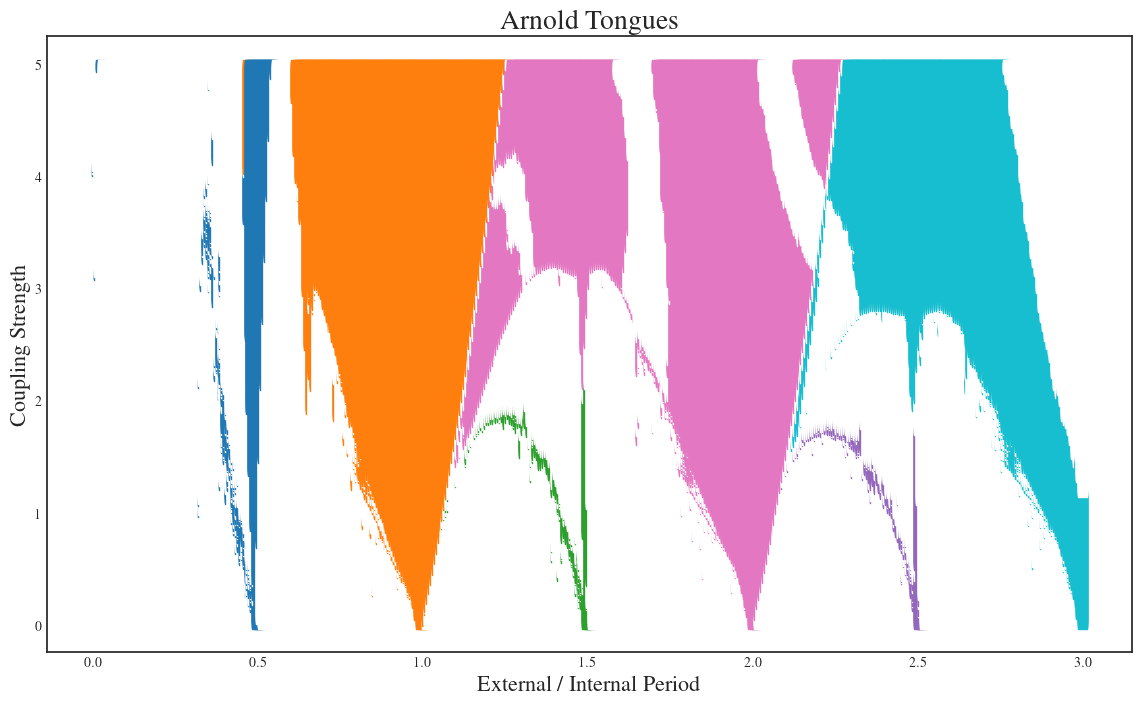

In [67]:
plt.figure(figsize=(14,8))

plt.scatter(Omegas_tested, Coupling_strengths_tested, c=color_map, s=40, marker="s")

plt.title("Arnold Tongues", fontsize=20)
plt.ylabel("Coupling Strength", fontsize=16)
plt.xlabel("External / Internal Period", fontsize=16)